import and read Data

In [1]:
import pandas as pd 
import numpy as np 
from common.utils import daily_to_monthly , calculate_change
from automotive.automotive import generate_car_index
from real_estate.real_estates import generate_housing_index
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
from gold.gold import generate_missing_gold
from stock.stocks import generate_missing_stock
from coin.gold_coin import generate_missing_imami



In [2]:
df_usd = pd.read_csv("usd/USD_IRR.csv")
df_imami = pd.read_csv("coin/Imami_coin.csv")
df_stock = pd.read_csv("stock/stock.csv")
df_gold = pd.read_csv("gold/24_carat_gold.csv")

df_usd = daily_to_monthly(df_usd)  
df_imami = daily_to_monthly(df_imami)  
df_stock = daily_to_monthly(df_stock)  
df_gold = daily_to_monthly(df_gold)  

df_usd

,Date,Price
0,1360/07,270.0
1,1360/08,270.0
2,1360/09,270.0
3,1360/10,270.0
4,1360/11,270.0
...,...,...
505,1402/08,511658.0
506,1402/09,504426.0
507,1402/10,514272.0
508,1402/11,559332.0


Correlation

         usd   gold  imami  stock
usd    1.000  0.996  0.989  0.955
gold   0.996  1.000  0.996  0.955
imami  0.989  0.996  1.000  0.935
stock  0.955  0.955  0.935  1.000


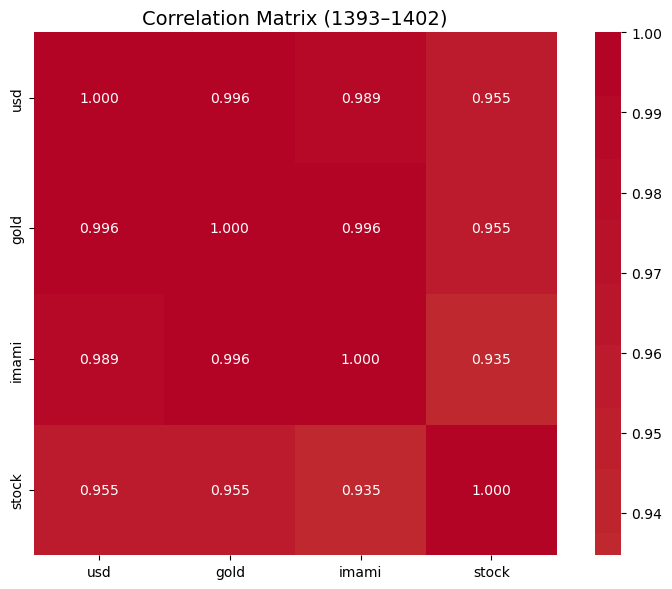

In [3]:
dfs = [
    df_usd[["Date", "Price"]].rename(columns={"Price": "usd"}),
    df_gold[["Date", "Price"]].rename(columns={"Price": "gold"}),
    df_imami[["Date", "Price"]].rename(columns={"Price": "imami"}),
    df_stock[["Date", "Price"]].rename(columns={"Price": "stock"}),
]


df_merged = reduce(
    lambda left, right: pd.merge(left, right, on="Date", how="inner"),
    dfs
)

corr_matrix = df_merged.drop(columns="Date").corr()
print(corr_matrix.round(3))

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    center=0,
    square=True,
    fmt=".3f"
)
plt.title("Correlation Matrix (1393–1402)", fontsize=14)
plt.tight_layout()
plt.show()


In [4]:

merged = df_usd[["Date", "Price"]].rename(columns={"Price": "usd"})
merged = merged.merge(df_imami[["Date", "Price"]].rename(columns={"Price": "imami"}), on="Date")
merged = merged.merge(df_gold[["Date", "Price"]].rename(columns={"Price": "gold"}), on="Date")
merged = merged.merge(df_stock[["Date", "Price"]].rename(columns={"Price": "stock"}), on="Date")


imami_usd = (merged["imami"] / merged["usd"]).mean()
gold_usd  = (merged["gold"] / merged["usd"]).mean()
stock_usd = (merged["stock"] / merged["usd"]).mean()

print(f"iamami / usd = {imami_usd:.1f}")
print(f"gold / usd = {gold_usd:.1f}")
print(f"stock / usd = {stock_usd:.1f}")

iamami / usd = 383.4
gold / usd = 48.5
stock / usd = 3.1


In [5]:
missing_gold = generate_missing_gold(
    usd_df=df_usd, 
    start_date="1393/02",  
    ratio=48.5
)


df_gold_full = pd.concat(
    [missing_gold, df_gold],
    ignore_index=True
)


df_gold_full = df_gold_full.sort_values("Date").reset_index(drop=True)


print("month len ", len(df_gold_full))
print("first m ", df_gold_full["Date"].iloc[0])
print("last m ", df_gold_full["Date"].iloc[-1])



month len  513
first m  1360/07
last m  1403/03


In [6]:
missing_stock = generate_missing_stock(
    usd_df=df_usd,
    start_date="1393/04",   
    ratio=3.1
)


df_stock_full = pd.concat(
    [missing_stock, df_stock],
    ignore_index=True
)


df_stock_full = df_stock_full.sort_values("Date").reset_index(drop=True)


print("month len:", len(df_stock_full))
print("first m :", df_stock_full["Date"].iloc[0])
print("last m :", df_stock_full["Date"].iloc[-1])


month len: 513
first m : 1360/07
last m : 1403/03


In [ ]:
missing_imami = generate_missing_imami(
    usd_df=df_usd,
    start_date="1389/01",   
    ratio=383.4
)


df_imami_full = pd.concat(
    [missing_imami, df_imami],
    ignore_index=True
)


df_imami_full = df_imami_full.sort_values("Date").reset_index(drop=True)


print("month len", len(df_imami_full))
print("first m", df_imami_full["Date"].iloc[0])
print("last m", df_imami_full["Date"].iloc[-1])


month len 513
first m 1360/07
last m 1403/03


In [8]:
df_car = generate_car_index(df_usd)
df_housing = generate_housing_index(df_usd)

print(df_car.head(-1))
print(df_housing.head(-1))


        Date  Price
0    1360/07   0.00
1    1360/08   0.00
2    1360/09   0.00
3    1360/10   0.00
4    1360/11   0.00
..       ...    ...
504  1402/07  90.03
505  1402/08  91.69
506  1402/09  92.01
507  1402/10  91.81
508  1402/11  97.34

[509 rows x 2 columns]
        Date  Price
0    1360/07   0.00
1    1360/08   0.00
2    1360/09   0.00
3    1360/10   0.00
4    1360/11   0.00
..       ...    ...
504  1402/07  90.51
505  1402/08  93.17
506  1402/09  95.31
507  1402/10  96.96
508  1402/11  98.67

[509 rows x 2 columns]


In [9]:
df_stock_full = df_stock_full.rename(columns={"Price": "stock_price"})
df_gold_full = df_gold_full.rename(columns={"Price": "gold_price"})
df_usd = df_usd.rename(columns={"Price": "usd_price"})
df_housing = df_housing.rename(columns={"Price": "housing_price"})
df_car = df_car.rename(columns={"Price": "car_price"})
df_imami_full = df_imami_full.rename(columns={"Price": "imami_price"})


In [10]:
base_df = df_stock_full.copy()

df_final = base_df.copy()

df_final = df_final.merge(
    df_gold_full,
    on="Date",
    how="left"
)

df_final = df_final.merge(
    df_usd,
    on="Date",
    how="left"
)

df_final = df_final.merge(
    df_housing,
    on="Date",
    how="left"
)

df_final = df_final.merge(
    df_car,
    on="Date",
    how="left"
)

df_final = df_final.merge(
    df_imami_full,
    on="Date",
    how="left"
)

In [12]:
df_final = df_final.sort_values("Date").reset_index(drop=True)


In [13]:
df_final = df_final.sort_values("Date").reset_index(drop=True)

df_final.ffill(inplace=True)
df_final.bfill(inplace=True)


In [14]:
print(df_final.isna().sum())
df_final

Date             0
stock_price      0
gold_price       0
usd_price        0
housing_price    0
car_price        0
imami_price      0
dtype: int64


,Date,stock_price,gold_price,usd_price,housing_price,car_price,imami_price
0,1360/07,837.0,13095.0,270.0,0.00,0.00,104546.0
1,1360/08,837.0,13095.0,270.0,0.00,0.00,103232.0
2,1360/09,837.0,13095.0,270.0,0.00,0.00,104859.0
3,1360/10,837.0,13095.0,270.0,0.00,0.00,106671.0
4,1360/11,921.0,13095.0,270.0,0.00,0.00,103033.0
...,...,...,...,...,...,...,...
508,1402/11,2104941.0,37152429.0,559332.0,98.67,97.34,327004286.0
509,1402/12,2124098.0,40264905.0,591460.0,100.00,100.00,354724286.0
510,1403/01,2236963.0,47243105.0,591460.0,100.00,100.00,423192105.0
511,1403/02,2193067.0,46072423.0,591460.0,100.00,100.00,415060385.0


In [ ]:
for col in ["housing_price", "car_price"]:
    if pd.isna(df_final[col].iloc[0]) or df_final[col].iloc[0] == 0:
        df_final[col].iloc[0] = 1.0


df_norm = df_final.copy()
cols = df_final.columns.drop("Date")

for col in cols:
    df_norm[col] = df_norm[col] / df_norm[col].iloc[0] * 100
df_norm

,Date,stock_price,gold_price,usd_price,housing_price,car_price,imami_price
0,1360/07,100.000000,100.000000,100.000000,100.0,100.0,100.000000
1,1360/08,100.000000,100.000000,100.000000,0.0,0.0,98.743137
2,1360/09,100.000000,100.000000,100.000000,0.0,0.0,100.299390
3,1360/10,100.000000,100.000000,100.000000,0.0,0.0,102.032598
4,1360/11,110.035842,100.000000,100.000000,0.0,0.0,98.552790
...,...,...,...,...,...,...,...
508,1402/11,251486.379928,283714.616266,207160.000000,9867.0,9734.0,312785.076426
509,1402/12,253775.149343,307483.046964,219059.259259,10000.0,10000.0,339299.720697
510,1403/01,267259.617682,360772.088583,219059.259259,10000.0,10000.0,404790.336311
511,1403/02,262015.173238,351832.172585,219059.259259,10000.0,10000.0,397012.209936


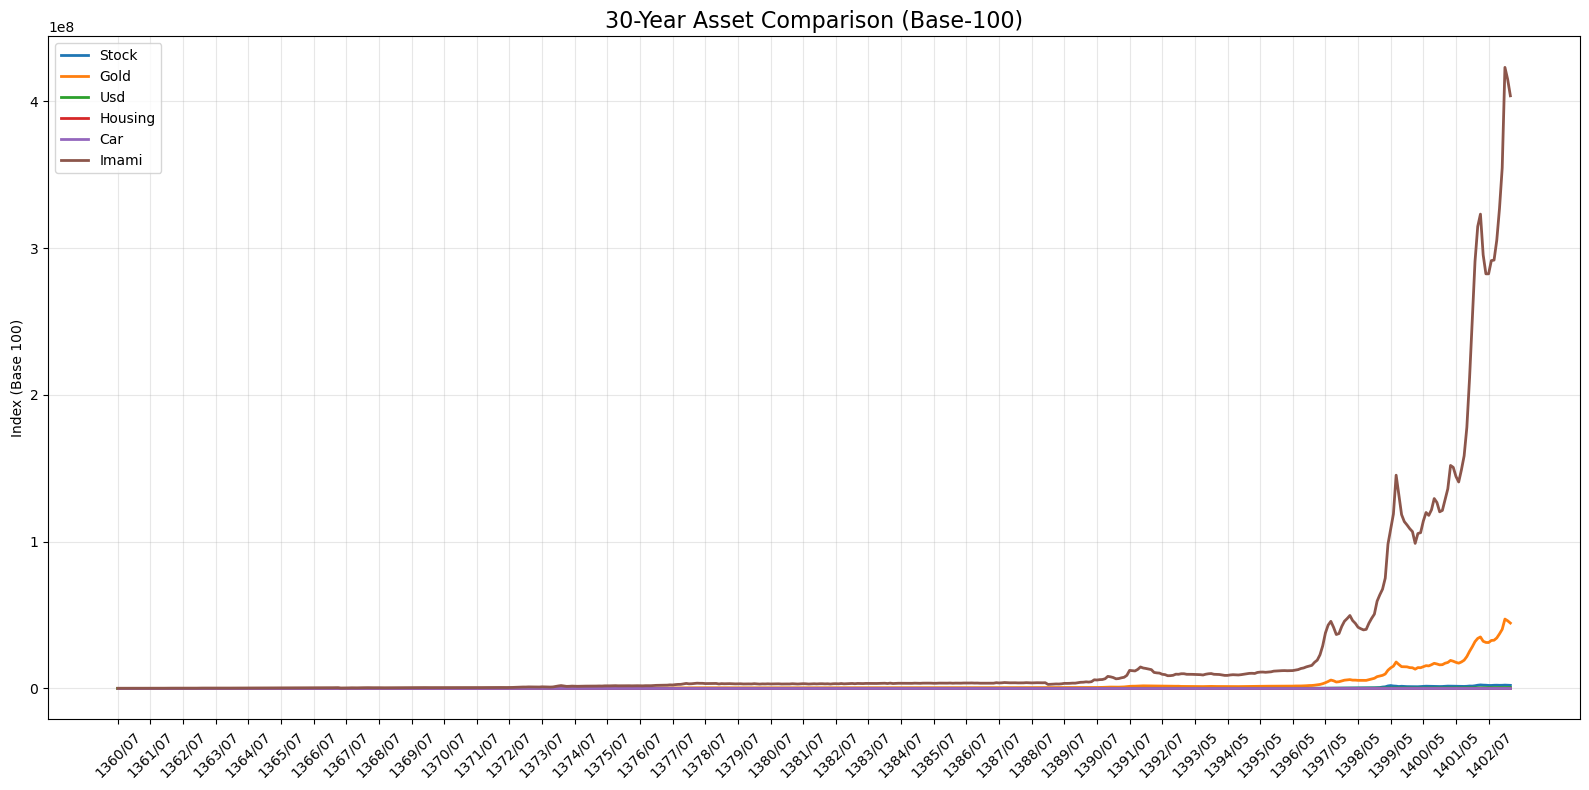

In [ ]:
import matplotlib.pyplot as plt

df_plot = df_final.copy()
cols = df_final.columns.drop("Date")

plt.figure(figsize=(16, 8))

colors = {
    "stock_price": "#1f77b4",
    "gold_price": "#ff7f0e",
    "usd_price": "#2ca02c",
    "housing_price": "#d62728",
    "car_price": "#9467bd",
    "imami_price": "#8c564b"
}


for col in cols:
    plt.plot(
        range(len(df_plot)),
        df_plot[col],
        label=col.replace("_price", "").capitalize(),
        color=colors.get(col, "black"),
        linewidth=2
    )


xticks_idx = list(range(0, len(df_plot), 12))
xticks_labels = df_plot["Date"].iloc[xticks_idx]

plt.xticks(xticks_idx, xticks_labels, rotation=45)
plt.ylabel("Index (Base 100)")
plt.title("30-Year Asset Comparison (Base-100)", fontsize=16)
plt.grid(alpha=0.3)
plt.legend(loc="upper left", fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
df_final.to_csv("df_final.csv", index=False, encoding="utf-8-sig")
